# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**LAB2**

## Homework 1

Install Keras library on your personal computer at home 

https://keras.io/getting_started/#installing-keras

or simply use google colab

https://colab.research.google.com/

## Homework 2

Write a simple neural network solving OR or AND task using keras library

## Introduction to the neural networks

In this lab we will learn how to create the most simple neural network from scratch.

### Simple forward propagation

<img src="img/simple_network.png" 
     width=350 height=350 
     style="display: block; margin: 0 auto"/>

The value of each output neuron can be calculated using the formula:
$$ y_j = b_j + \sum\limits_{i} x_iw_{ij} $$

or in matrix form"

$$ Y = XW + B, $$

where $X = [x_1 ... x_i], \quad$ $W=\left[\begin{array}{ccc} w_{11} & \ldots & w_{1 j} \\ \vdots & \ddots & \vdots \\ w_{i 1} & \ldots & w_{i j} \end{array}\right] \quad$ and $B = [b_1 ... b_j]$.

In [1]:
import numpy as np

X = [1, 2, 3]

W = [[ 0.2, 0.8, -0.5],
     [ 0.5, -0.91, 0.26],
     [0.5, 0.4, 0.6]]

B = [2, 3, 4]

Y = np.dot(X, W) + B
print(Y)

[4.7  3.18 5.82]


## Single layer perceptron solving XOR

[XOR gate](https://en.wikipedia.org/wiki/XOR_gate) is a logical operation that gives a true output when the number of true inputs is odd:

| A  | B  | A XOR B |
|--- |--- | ------- |
| 0  | 0  | 0       |
| 0  | 1  | 1       |
| 1  | 0  | 1       |
| 1  | 1  | 0       |

In [2]:
# inputs
a = np.array([0, 0, 1, 1])
b = np.array([0, 1, 0, 1])

# combined input
x = np.array([a, b])
print(x.shape)

# outputs / labels
y_true = np.array([[0,1,1,0]])

(2, 4)


### Activation function (Sigmoid)

The Sigmoid function maps a number into the continuous interval between 0 and 1:

$$ S(x) = \frac{1}{1 + e^{-x}} $$

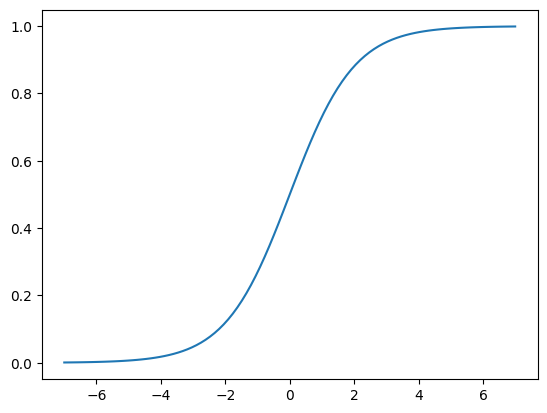

In [3]:
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))


# Plot Sigmoid function
x_arr = np.linspace(-7, 7, num=100)
plt.plot(x_arr, sigmoid(x_arr));

In [4]:
# Define the number of neurons
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Total training examples
samples = x.shape[1]

# Learning rate
lr = 0.1

# Define random seed to replicate the outputs
np.random.seed(1337)

# Initializing the weights for hidden and output layers
w1 = np.random.rand(hidden_neurons, input_neurons)
w2 = np.random.rand(output_neurons, hidden_neurons)

print(f"w1 = \n{w1}")
print(f"w2 = \n{w2}")

w1 = 
[[0.26202468 0.15868397]
 [0.27812652 0.45931689]]
w2 = 
[[0.32100054 0.51839282]]


Our network is going to look like this:

<img src="img/xor_slp.png" 
     width=800 height=300 
     style="display: block; margin: 0 auto"/>

### Forward propagation

In [5]:
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2, a1)
    y_pred = sigmoid(z2)
    return z1, a1, z2, y_pred

The final output $y$ expression is:
$$ y_{pred} = S(S(XW_1^T)W_2^T), $$

where:
$$ Z_1 = XW_1^T $$
$$ A_1 = S(Z_1) $$
$$ Z_2 = A_1W_2^T $$
$$ y_{pred} = S(Z_2) $$

After that we can find the error of our prediction. For that we will use Mean Squared Error:

$$ \text{MSE} = \frac{1}{2}\left( Y_{\text{true}} - Y_{\text{pred}} \right)^2 $$

### Backpropagation

Back-propagation is the essence of neural net training. It is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. loss) obtained in the previous epoch (i.e. iteration).

The main expression of the backpropagation is simply a derivative of out output from the forward propagation:


$$ \frac{\partial \text{err}}{\partial W_1} = \frac{\partial \text{err}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W_1} $$

$$ \frac{\partial \text{err}}{\partial W_2} = \frac{\partial \text{err}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2} $$

If calculate it, we get:

$$ \frac{\partial \text{err}}{\partial y_{pred}} = \left( \text{MSE}(Y_{true}, Y_{pred}) \right)^{\prime} = \left(\frac{1}{2}(y_{true} - y_{pred})^2\right)^{\prime} = y_{pred} - y_{true}$$

$$ \frac{\partial y_{pred}}{\partial Z_2} = \left( \sigma(Z_2) \right)^{\prime} = \sigma(Z_2) \cdot \left( 1 - \sigma(Z_2)\right) $$

$$ \frac{\partial Z_2}{\partial W_2} = (A_1W_2^T)^{\prime} = A_1$$

$$ \frac{\partial \text{err}}{\partial W_2} = (y_{pred} - y_{true}) \cdot \sigma(Z_2) \left( 1 - \sigma(Z_2)\right) \cdot A_1$$

In [6]:
def back_prop(w1, w2, z1, a1, z2, y_pred, y_true):
    
    dz2 = (y_pred - y_true) * y_pred * (1 - y_pred) 
    dw2 = np.dot(dz2, a1.T)
    dw2 = np.reshape(dw2, w2.shape)   

    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T)
    dw1 = np.reshape(dw1, w1.shape)
    
    return dz2, dw2, dz1, dw1

### First iteration

In [7]:
z1, a1, z2, y_pred = forward_prop(w1, w2, x)
loss = 0.5 * (y_true - y_pred) ** 2
da2, dw2, dz1, dw1 = back_prop( w1, w2, z1, a1, z2, y_pred, y_true)

print(y_pred, y_true)

[[0.60341067 0.62031988 0.61690188 0.63284298]] [[0 1 1 0]]


### New weights

$$ w_1 = w_1 - (lr \cdot dw_1) $$
$$ w_2 = w_2 - (lr \cdot dw_2) $$

Text(0, 0.5, 'Loss value')

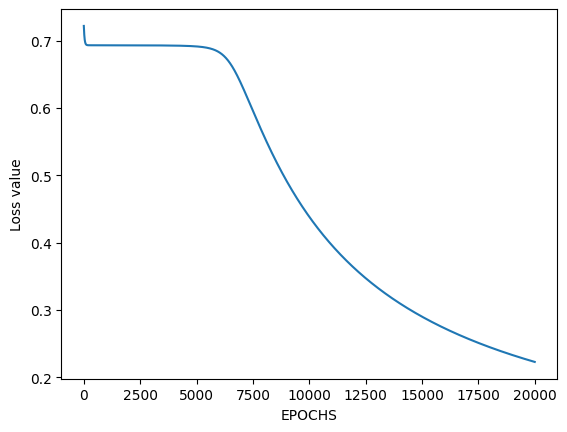

In [8]:
losses = []
iterations = 20000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, w2, x)
    loss = -(1/samples) * np.sum(y_true * np.log(a2) + (1-y_true) * np.log(1-a2))
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(w1, w2, z1, a1, z2, a2, y_true)
    w2 = w2 - lr*dw2
    w1 = w1 - lr*dw1

# Plot loss to see if the network is learning
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

## Prediction

In [9]:
def predict(w1, w2, input):
    z1, a1, z2, y_pred = forward_prop(w1, w2, input)
    y_pred = np.squeeze(y_pred)
    
    if y_pred >= 0.5:
        print(f"For input {input} output is 1")
    else:
        print(f"For input {input} output is 0")

predict(w1, w2, np.array([0, 1]))

For input [0 1] output is 1


# Same model with Keras and Tensorflow

Tensorflow is a machine learning platform which we will be using for out labs throughout this course. To install it, mainly use the commands:

In [10]:
## Installation for MacOS
#!python -m pip install tensorflow-macos

## Installation for linux/windows
#!pip install tensorflow


#!pip install keras

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Creating the training dataset

In [12]:
a = np.array([0, 0, 1, 1])
b = np.array([0, 1, 0, 1])
x_train = np.array(list(zip(a,b)))
print(x_train)

y_train = np.array([0, 1, 1, 0])

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


## Neural network description

A [Sequential model](https://www.tensorflow.org/guide/keras/sequential_model) is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


model = keras.Sequential( 
    [
        layers.Input(shape = x_train[0].shape),
        layers.Dense(10, activation="relu", name="layer1"),
        layers.Dense(10, activation="relu", name="layer2"),
        layers.Dense(1, activation = "sigmoid", name="layer3"),
    ]
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                30        
                                                                 
 layer2 (Dense)              (None, 10)                110       
                                                                 
 layer3 (Dense)              (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### Selecting main parameters and compiling the model

In [14]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "binary_accuracy")
history = model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000


2022-09-11 21:17:10.541000: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 199ms/step - loss: 0.7210 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7190 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7169 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7149 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 979us/step - loss: 0.7129 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7109 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 976us/step - loss: 0.7089 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 919us/step - loss: 0.7069 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7050 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 2ms/

### Prediction

In [15]:
model.predict(x_train).round()

1/1 [==============================] - 0s 56ms/step


array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [16]:
x_train

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### Plotting loss with keras

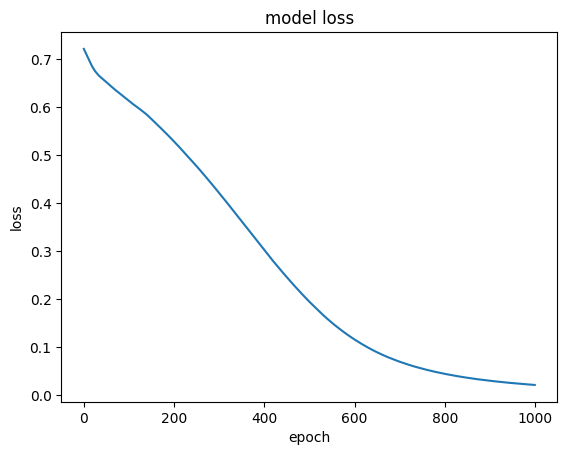

In [17]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()